# Lesson 8 - TimeSeries Analysis on Milk Production
Version: Jun-2019

## Author - Priya Asokan

## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


## Conclusion
### Time Series Analysis for Milk Production
#### Section 1 -
1. Is this time series stationary?

With D-Fuller test, p-value = 0.3403744714045853. It is not stationary as the p value is very large. we select the null hypothesis (It is not stationary).

2. Is there a significant seasonal component to this time series?

Yes it has a significant seasonal component as Milk production data has a specific pattern during a specific priod of time and repeats itself at regular intervals.

3. Perform STL decomposition of the time series.  Should this decomposition be performed with the additive or multiplicative (log of values) model? Are the residuals stationary?

This decomposition should be done with multiplicative(log of milk production values) model. The residuals are stationary after decompostion as the p-value = 4.5217922238641876e-13. So we select the alternate hypothesis - the residuals are stationary.

4. Use the auto_arima function from the pmdarima package to find a best model fit, excluding the last 12 months of observations from the training data, and setting d=1 and D=1 and limit p, q, P and Q to 3 with starting values of 1. Which model coefficients are statistically significant?

Best model with BIC = -1067.830 and with order (0, 1, 1)
#### Section 2 -
1. Are the predictions close to the actual observations?

Yes, they are very close.
2. Are the residuals approximately Normally distributed? 

From Q-Q plot we see that they are normally distributed.
3. What is the RMSE? Is this value small relative to the forecasted values?

RMSE value calculated using auto_ARIMA function is 0.12. It is small compared to the RMSE caluculated with the model that has only trend and seasonal (0.13). 
4. Are the confidence intervals reasonably small compared to the forecast means?

Yes, the confidence intervals(-2.875 and -2.574) are small when compared to the forcast means of 0.

5. How do the confidence intervals behave as time moves to the future?

Confidence intervals remains the same as time moves in the future. (Critical value at 5% confidence = -2.875537986778846
Critical value at 10% confidence = -2.574231080806213)

### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as sts
from math import pi
from numpy import random as nr
from math import sin
import statsmodels.graphics.tsaplots as splt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
# Load the dataset from a CSV file to a dataframe
CADairyCSVName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"
CADairy = pd.read_csv(CADairyCSVName)
print(CADairy.iloc[:,:3].head(3))
print(CADairy.iloc[:,:3].tail(3))
print(CADairy.dtypes)
print(CADairy.shape)

   Year Month  Cotagecheese.Prod
0  1995   Jan              4.370
1  1995   Feb              3.695
2  1995   Mar              4.538
     Year Month  Cotagecheese.Prod
225  2013   Oct              2.284
226  2013   Nov              1.865
227  2013   Dec              2.345
Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object
(228, 9)


In [3]:
# Create Index for time period 228 months from Jan 1995 to Dec 2013
# end has to be one month greater (1-2014) than last value (12-2013)
CADairy.index = pd.date_range(start = '1-1995', end = '1-2014', freq = 'M')
print(CADairy.iloc[:,:3].head(3))
print(CADairy.iloc[:,:3].tail(3))

            Year Month  Cotagecheese.Prod
1995-01-31  1995   Jan              4.370
1995-02-28  1995   Feb              3.695
1995-03-31  1995   Mar              4.538
            Year Month  Cotagecheese.Prod
2013-10-31  2013   Oct              2.284
2013-11-30  2013   Nov              1.865
2013-12-31  2013   Dec              2.345


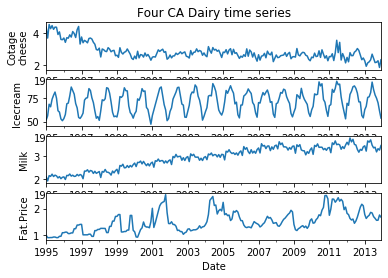

In [4]:
# Plot the time series for Milk,Icecream, cottage cheese and Fat Price
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
CADairy.loc[:,'Cotagecheese.Prod'].plot(ax = ax1)
CADairy.loc[:,'Icecream.Prod'].plot(ax = ax2)
CADairy.loc[:,'Milk.Prod'].plot(ax = ax3)
CADairy.loc[:,'N.CA.Fat.Price'].plot(ax = ax4)
ax1.set_ylabel('Cotage\ncheese')
ax2.set_ylabel('Icecream')
ax3.set_ylabel('Milk')
ax4.set_ylabel('Fat.Price')
ax4.set_xlabel('Date')
ax1.set_title('Four CA Dairy time series')
plt.show()

### Milk Production

In [5]:
# Taking Milk Production
SeriesOfInterest = CADairy['Milk.Prod'] # 'Milk.Prod'

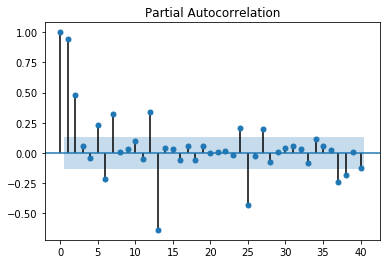

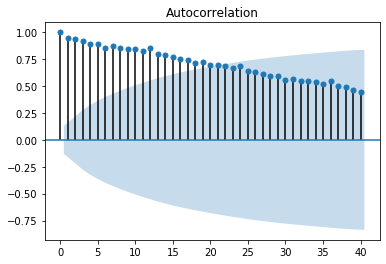

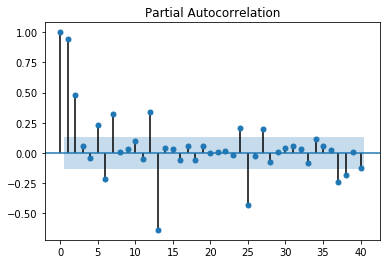

In [6]:
# Show ACF and PACF of SeriesOfInterest (Milk Prod)
splt.plot_acf(SeriesOfInterest, lags = 40)
splt.plot_pacf(SeriesOfInterest, lags = 40)


From the ACF & PACFplots for Milk production time series, we see that there is significant auto correlation and partial auto correlation values.

In [7]:
# D. Fuller test on SeriesOfInterest
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(CADairy['Milk.Prod'])

D-F statistic = -1.8824231111050467
p-value = 0.3403744714045853
number of lags used = 12
Critical value at 5% confidence = -2.875078880098608
Critical value at 10% confidence = -2.5739861168199027


From D- Fuller test statistics, P value is very high so we select the null hypothesis. The time series is not stationary.

In [8]:
# Taking Log of Milk Prod
CADairy['log-Milk.Prod'] = np.log(CADairy['Milk.Prod'])
print(CADairy['log-Milk.Prod'])

1995-01-31    0.747635
1995-02-28    0.658556
1995-03-31    0.771034
1995-04-30    0.756122
1995-05-31    0.800655
                ...   
2013-08-31    1.223775
2013-09-30    1.162213
2013-10-31    1.205372
2013-11-30    1.186318
2013-12-31    1.245019
Freq: M, Name: log-Milk.Prod, Length: 228, dtype: float64


### STL Decomposition

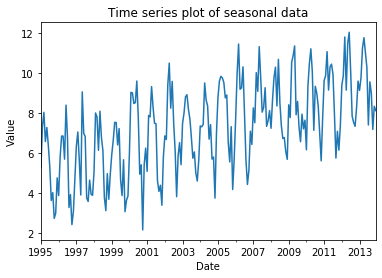

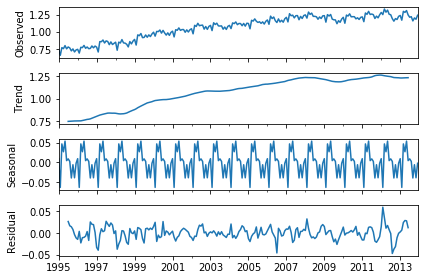

In [9]:
# Decompose Log-Milk.Prod using STL into S, T, and residuals

# Plot to show the time series data
def plot_ts(ts, lab = ''):
    ts.plot()
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')
# function to compute the seasonal component
from math import pi
def seasonal_ts(start = '1-1995', end = '1-2014', freq = 'M', slope = 0.02, sd = 1.0, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)# Get the dates from the date range
    # compute the seasonal value
    seasonal = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    seasonal = seasonal + nr.normal(loc = mean, scale = sd, size = len(dates))
    seasonal = seasonal + [2.0*sin(pi*x/6) for x in range(len(dates))] + 5.0
    return(seasonal)

seasonal = seasonal_ts()
plot_ts(seasonal, 'seasonal data')# Plot seasonal data
#Function to decompose the seasonal component and get the residuals
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )
# Decompose the Milk Prod to seasonal, trend and residuals
milkProd_decomp = decomp_ts(CADairy['log-Milk.Prod'])

The periodic component looks reasonable and stationary.

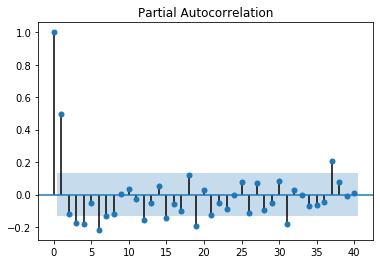

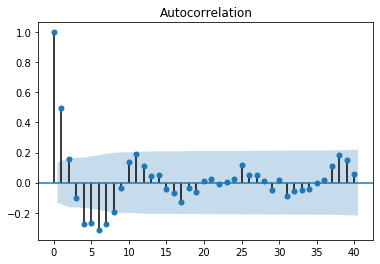

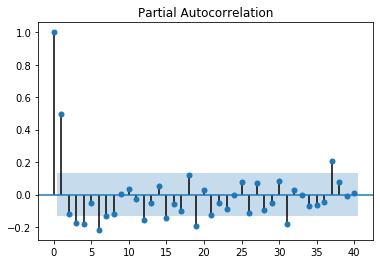

In [10]:
# Show ACF and PACF of STL decomposition of Milk Prod residuals without nans
splt.plot_acf(milkProd_decomp.resid[6:-6], lags = 40)
splt.plot_pacf(milkProd_decomp.resid[6:-6], lags = 40)


The ACF and PCF plots show significant auto correlation and partial autocorrelation values.

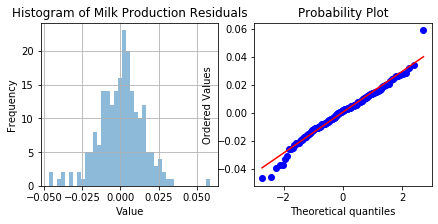

In [11]:
# Histogram and QQ plot of residuals from STL decomposition

def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    
dist_ts(milkProd_decomp.resid[6:-6], 'Milk Production Residuals')  

From the histogram and Q-Q plot , we see that they are normally distributed.

In [12]:
# Use D. Fuller test on residuals after STL decomposition
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(milkProd_decomp.resid[6:-6])

D-F statistic = -8.280935682685273
p-value = 4.5217922238641876e-13
number of lags used = 7
Critical value at 5% confidence = -2.875537986778846
Critical value at 10% confidence = -2.574231080806213


After STL decomposition, From D-F test we see that p- value is very small so we select the alternate hypothesis. The residuals are stationary.

### ARIMA Model

In [13]:
# Build an ARIMA model using auto_arima function with pmdarima package
from pmdarima import auto_arima
ts_model = auto_arima(CADairy.loc[:'2012-12-31','log-Milk.Prod'], start_p=1, start_q=1,                          
                             max_p=3, max_q=3, m=12,
                             start_P=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
ts_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-1080.263, BIC=-1060.384, Fit time=4.621 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-982.860, BIC=-976.234, Fit time=0.118 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-1033.623, BIC=-1020.371, Fit time=2.162 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-1081.083, BIC=-1067.830, Fit time=3.597 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-1080.133, BIC=-1063.567, Fit time=3.356 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-986.608, BIC=-976.669, Fit time=0.693 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-1080.417, BIC=-1063.851, Fit time=5.744 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-1077.783, BIC=-1057.904, Fit time=6.898 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-1080.607, BIC=-1064.041, Fit time=1.694 seconds
Fit ARIMA: ord

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  216
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 544.542
Date:                            Tue, 02 Jun 2020   AIC                          -1081.083
Time:                                    16:46:24   BIC                          -1067.830
Sample:                                         0   HQIC                         -1075.721
                                            - 216                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.889      0.374      -0.001       0.000
ma.L1         -0.1908      0.064     -3.004      0.003      -0.315      -0.066
ma.S.L12      -0.8075      0.062    -12.934      0.000      -0.930      -0.685
sigma2         0.0003      2e-05     12.858      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       51.80   Jarque-Bera (JB):                21.16
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.03
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best model with BIC = -1067.830 and with order (0, 1, 1)

### Forecasting Time Series

In [14]:
# Determine Predictions of Training Data
NumberOfPredictionPeriods = 12
LastTrainDate = CADairy.index[CADairy.shape[0] - (NumberOfPredictionPeriods + 1)]

CADairy.loc[:LastTrainDate,'TrainingScores'] =  ts_model.predict_in_sample()
# print(CADairy.loc[:LastTrainDate,'TrainingScores'])
CADairy.loc[:LastTrainDate,'Residuals'] = ts_model.resid()
# print(CADairy.loc[:LastTrainDate,'Residuals'])

# correct first training prediction because prediction of first training value is always off
CADairy.loc[CADairy.index[0], 'TrainingScores'] = CADairy.loc[CADairy.index[0], 'log-Milk.Prod']
CADairy.loc[CADairy.index[0],'Residuals'] = 0

# Forecast Test Predictions
NumberOfPredictionPeriods = 12 
FirstTestDate = CADairy.index[CADairy.shape[0] - NumberOfPredictionPeriods]
CADairy.loc[FirstTestDate:,'TestScores'] = ts_model.predict(n_periods=NumberOfPredictionPeriods)

LastTrainDate- 2012-12-31;FirstTestDate- 2013-1-31

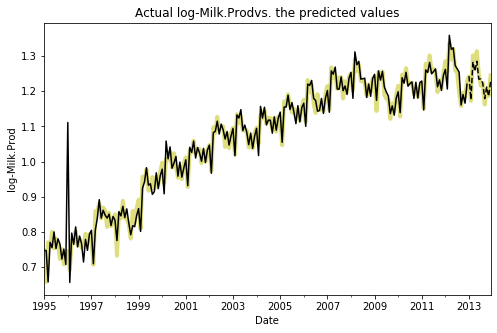

In [15]:
# Show actual and explained values of first 17 years
# Show predicted values for last year

def plot_mod_fit(df, col):
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'y', alpha=0.5, linewidth=4, ax = ax)
    df.loc[:, 'TrainingScores'].plot(ax = ax, color='black')
    df.loc[:, 'TestScores'].plot(ax = ax, linestyle='dashed', color='black') 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis

plot_mod_fit(CADairy, 'log-Milk.Prod')

The above plots show the actual traing scores of time series in black and the predicted test scores values by the model in yellow. They are very close.

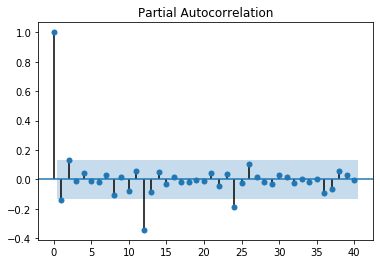

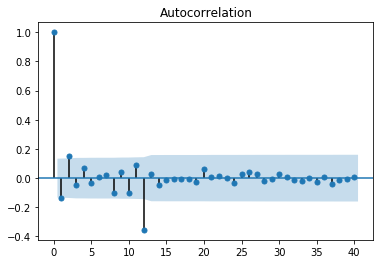

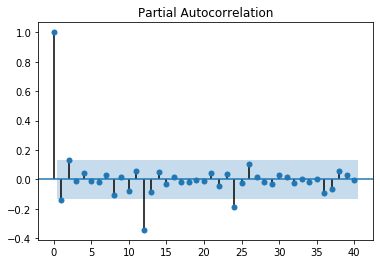

In [16]:
# Show ACF and PACF of residuals of ts_model
import statsmodels.graphics.tsaplots as splt

splt.plot_acf(ts_model.resid(), lags = 40)
splt.plot_pacf(ts_model.resid(), lags = 40)

The ACF and PCF plots show significant auto correlation and partial autocorrelation values at lag 0, lag 11 and lag 25.

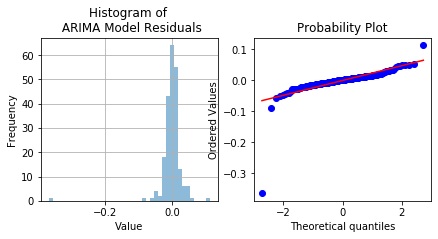

In [17]:
# Show histogram and QQ plot of residuals from ts_model
dist_ts(CADairy.loc[:LastTrainDate,'Residuals'], '\n ARIMA Model Residuals')

Q-Q plot shows that they are normal as most of the points lie in a staright line

In [18]:
# Use D. Fuller test on ts_model residuals
DF_Test(CADairy.loc[:LastTrainDate,'Residuals'])

D-F statistic = -17.61610963430109
p-value = 3.858625777738011e-30
number of lags used = 0
Critical value at 5% confidence = -2.875078880098608
Critical value at 10% confidence = -2.5739861168199027


From D-F test, p value is very small so we select the alternate hypothesis. They are stationary.

In [19]:
# The predict method is applied to the 'Ts_model' model to compute a forecast for 12 months.
# RMSE value is calculated with the Test score
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

RMSE(CADairy.loc[FirstTestDate:, 'log-Milk.Prod'].values, CADairy.loc[FirstTestDate:,'TestScores'])

0.12536423078441786

RMSE value of forecast computed with the auto_arima function is 0.125364.

### Fit for predicted trend and seasonal components for milk production time series

In [20]:
# Create new features, the count of months from the start of the
# series and the square of the count of months.
CADairy.loc[:, 'Month_Cnt'] = [float(i + 1) for i in range(len(CADairy['log-Milk.Prod']))]
CADairy.loc[:, 'Month_Cnt2'] = [x**2 for x in CADairy.Month_Cnt]

## Normalize the time features
from scipy.stats import zscore
CADairy.loc[:, ['Month_Cnt', 'Month_Cnt2']] = CADairy.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

## Create dummy variables for the months
years = int(len(CADairy['log-Milk.Prod'])/12)
CADairy.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(CADairy.loc[:, 'Month'])
CADairy[list(dummies.columns)] = dummies

## Print the head of the data frame to look at the dummy variables.
CADairy.head(12)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,log-Milk.Prod,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,0.747635,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,0.658556,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,0.771034,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,0.756122,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125,0.800655,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216,0.753301,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343,0.781158,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512,0.766398,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729,0.723676,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000,0.751888,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# computes a linear model for coefficients of the trend and seasonal feature
import sklearn.linear_model as lm

X = CADairy.loc[:'2012-12-31', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values
Y = CADairy.loc[:'2012-12-31', 'log-Milk.Prod'].values
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)


#### RMSE of the fit of the model for the last 12 months of the log values of milk production time series.

In [22]:
#Forecast for next year - 2013
X = CADairy.loc['2012-12-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values
#RMSE calculation
RMSE(CADairy.loc['2012-12-31':, 'log-Milk.Prod'].values, mod_fit.predict(X))

0.13750978759549748

Root mean square error (RMSE) of the fit of the model for the last 12 months of the Milk production time series is 0.13